# ATAC seq analysis

Assay for Transposase-Accessible Chromatin

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import quantile_normalize

## Analyzing Peaks

In [52]:
peaks = pd.read_csv("../data/psd.bulk.zfish_atac.10hpf.lg1x.csv")

In [53]:
peaks.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.612648,5.204557,3.391132,4.552681,3.668004,4.766655,4.012215,4.486644,4.463738,4.861570,3.614023,3.696712,3.210026,4.679626,4.277916
1,4.721959,5.358137,3.557652,4.688727,3.546239,4.748463,4.012215,4.399901,4.690443,4.848311,3.776074,3.959122,3.531244,4.750276,4.439449
2,4.806994,5.338711,3.360469,4.163852,3.668004,4.955051,4.129443,4.353534,4.787046,4.735389,3.574781,4.325414,4.545861,4.917399,5.058778
3,4.879061,5.578282,4.236443,4.404106,4.145129,4.893466,4.429041,4.558759,4.650654,4.885431,4.076645,4.572297,4.306987,5.019714,4.859518
4,5.052703,5.736003,4.323331,4.790483,4.440677,5.033977,4.375875,4.868698,5.025405,5.054618,4.130548,4.473848,4.426082,5.211885,5.306444


In [54]:
peaks.shape

(370058, 15)

In [55]:
peaks.columns

Index(['anterior/posterior axis', 'central nervous system', 'forebrain',
       'immature eye', 'integument', 'lateral plate mesoderm',
       'mesenchyme cell', 'musculature system', 'neural crest', 'neural keel',
       'neural stem cell', 'periderm/epidermis', 'primary neuron',
       'segmental plate', 'YSL'],
      dtype='object')

### To do

- ✅ Check if the distribution of all the cell types are similar
- ✅ Look at the counts of the cell types
- ✅ Look at the distributions of the max, min, medium of the peaks (locations and regions in the genome)
- ✅ Look at the distribution of standard deviation and coefficient of variation (R2) of the peaks
- Use the gRELU package to train the model:
    - Start with a snippet e.g. 1000 peaks
    - If it works:
        - Extend to all peaks and run on GPU e.g. 480 (16 GB)
    - Get the model trained and then use the trained model to analyze seqs

### Distribution of all cell types

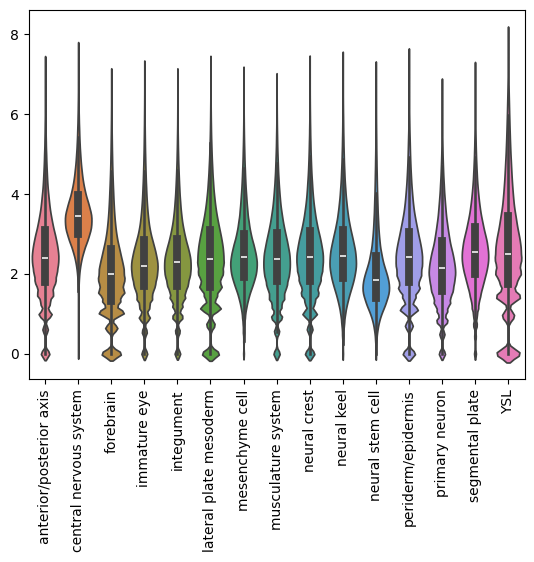

In [56]:
sns.violinplot(peaks)
plt.xticks(rotation = 90)
plt.show()

### Counts of Peaks of Cell Types

In [57]:
peaks.describe()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
count,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000
mean,2.473024,3.536111,2.023562,2.321343,2.346497,2.407008,2.532922,2.425564,2.447764,2.572684,2.064080,2.437607,2.253972,2.627580,2.613370
std,1.070666,0.827313,1.127322,1.023766,0.973497,1.160747,0.923803,1.022150,1.079779,0.987327,0.987930,1.124375,1.003211,0.971848,1.435154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.789679,2.998886,1.305784,1.680234,1.703114,1.655804,1.915261,1.819059,1.807913,1.898183,1.401331,1.798457,1.559132,1.989127,1.747344
50%,2.395626,3.441339,1.984860,2.197871,2.300787,2.354598,2.409666,2.360297,2.415504,2.442039,1.841349,2.405200,2.141170,2.531056,2.489766
75%,3.081055,3.965430,2.606833,2.833898,2.860317,3.099481,3.004450,3.005098,3.062962,3.090720,2.451874,3.052174,2.812083,3.161576,3.434497
max,7.277513,7.664428,6.962817,7.172454,6.985725,7.268406,7.033311,6.855766,7.287214,7.398556,7.155829,7.462169,6.726133,7.145679,7.960923


### Distributions of Min, Max and Median of Cell Types

### Distributions of standard deviation and coefficient of variation

### Quantile normalization of peaks

In [58]:
import numpy as np

In [59]:
peaks.columns.is_unique

True

In [60]:
df_sorted = pd.DataFrame(np.sort(peaks.values, axis=0), index=peaks.index, columns=peaks.columns)
df_sorted

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370053,7.167753,7.374600,6.879665,7.020755,6.756389,7.064274,6.732973,6.685861,7.103982,7.158713,6.972517,7.047686,6.557317,7.039992,7.907732
370054,7.170952,7.445451,6.880587,7.034955,6.802342,7.119773,6.761015,6.694119,7.143010,7.213888,7.000056,7.061611,6.586213,7.073957,7.928439
370055,7.203635,7.484753,6.905164,7.086172,6.886067,7.138450,6.778871,6.722052,7.197884,7.332518,7.032997,7.150853,6.686330,7.085467,7.935812
370056,7.270597,7.639064,6.907858,7.138944,6.956215,7.260993,6.876432,6.726486,7.201057,7.338068,7.111558,7.182750,6.691781,7.117093,7.943132


In [61]:
df_mean = df_sorted.mean(axis=1)
df_mean

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
370053    7.031347
370054    7.061091
370055    7.108468
370056    7.157468
370057    7.223795
Length: 370058, dtype: float64

In [62]:
df_mean.index = np.arange(1, len(df_mean) + 1)
df_mean

1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
            ...   
370054    7.031347
370055    7.061091
370056    7.108468
370057    7.157468
370058    7.223795
Length: 370058, dtype: float64

In [63]:
normalized_peaks = quantile_normalize(peaks)
normalized_peaks

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.651118,4.533672,3.743376,4.676512,3.889194,4.770185,4.072143,4.646133,4.503845,4.800124,3.992231,3.649010,3.416853,4.705932,3.646850
1,4.759777,4.715077,3.890921,4.802952,3.759139,4.749729,4.072143,4.552959,4.733108,4.789694,4.125601,3.914057,3.761764,4.784057,3.768121
2,4.844335,4.693973,3.715317,4.321034,3.889194,4.966067,4.201415,4.498629,4.829205,4.681877,3.960696,4.278734,4.914163,4.961720,4.249963
3,4.913120,4.970389,4.502000,4.538608,4.406436,4.899320,4.528167,4.722845,4.691382,4.822941,4.370635,4.526288,4.642561,5.065575,4.093085
4,5.091230,5.155606,4.580807,4.896827,4.731492,5.045142,4.468658,5.062934,5.069928,4.984374,4.415342,4.427255,4.779665,5.265965,4.454447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370053,2.318821,1.812450,1.710130,1.568871,2.083915,2.326503,1.820542,1.803709,1.471810,2.651219,2.076392,2.268933,1.552899,2.466095,2.502551
370054,3.310180,3.803464,2.857530,3.068696,3.334501,4.237360,3.218051,3.536887,3.644596,3.987058,3.301811,3.322042,3.441416,3.675032,2.822574
370055,2.980565,2.329382,2.777409,2.749148,2.730911,2.216906,3.040279,2.759981,3.251129,3.466096,2.468091,1.795211,2.802011,2.679805,1.456314
370056,3.098970,1.905814,0.000000,1.871133,2.608640,2.552562,3.126667,2.713946,2.290252,2.825516,2.573989,2.444564,2.649961,1.922973,2.706643


/var/folders/l3/s5z9brqx04s1rk1k3q9clswr0000gn/T/ipykernel_1858/3718688544.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
/var/folders/l3/s5z9brqx04s1rk1k3q9clswr0000gn/T/ipykernel_1858/3718688544.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)


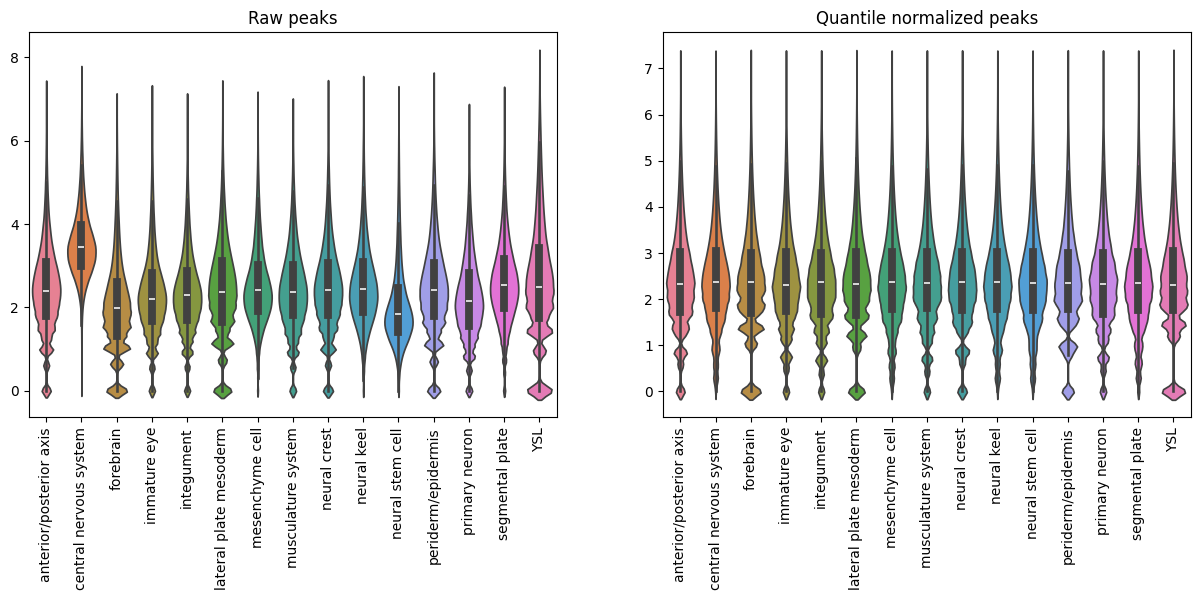

In [64]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.violinplot(peaks, ax = ax[0])
ax[0].set_title('Raw peaks')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.violinplot(normalized_peaks, ax = ax[1])
ax[1].set_title('Quantile normalized peaks')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
plt.show()

In [65]:
normalized_peaks.to_csv('../data/normalized_peaks.csv', index = False)

## Analyzing BED file

In [66]:
bed_data = pd.read_csv("../data/chromosomes.10hpf.bed", sep = '\t', header = None)
bed_data.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand']

In [67]:
bed_data.head()

,chrom,start,end,name,score,strand
0,chr1,5231,5732,.,0,.
1,chr1,5786,6287,.,0,.
2,chr1,10087,10588,.,0,.
3,chr1,10990,11491,.,0,.
4,chr1,11894,12395,.,0,.


In [68]:
bed_data.describe()

,start,end,score
count,3.700580e+05,3.700580e+05,370058.0
mean,2.712686e+07,2.712736e+07,0.0
std,1.689309e+07,1.689309e+07,0.0
min,3.600000e+01,5.370000e+02,0.0
25%,1.321669e+07,1.321719e+07,0.0
50%,2.621427e+07,2.621477e+07,0.0
75%,3.948675e+07,3.948725e+07,0.0
max,7.808975e+07,7.809026e+07,0.0


In [69]:
bed_data['score'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
370053    0
370054    0
370055    0
370056    0
370057    0
Name: score, Length: 370058, dtype: int64>